<a href="https://colab.research.google.com/github/vijayasri-manda/Data-Science/blob/main/Car%20Price%20Prediction/Car_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* **numpy:** Fundamental package for numerical computing in Python, especially for arrays and mathematical operations.

* **pandas:** Library for data manipulation and analysis, providing data structures like DataFrames.

* **matplotlib.pyplot:** Module for creating static, interactive, and animated visualizations in Python.

* **seaborn:** High-level interface for drawing attractive and informative statistical graphics.

* **os:** Module for interacting with the operating system, often used for file system operations.

* **warnings:** Module for handling warning messages generated during



In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [74]:
df=pd.read_csv('cardata.csv')

In [75]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [76]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [77]:
df.shape

(301, 9)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [79]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [80]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [81]:
df['year_diff']=2025-df['Year'] #for finding how old the car

In [82]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_diff
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [83]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'year_diff'],
      dtype='object')

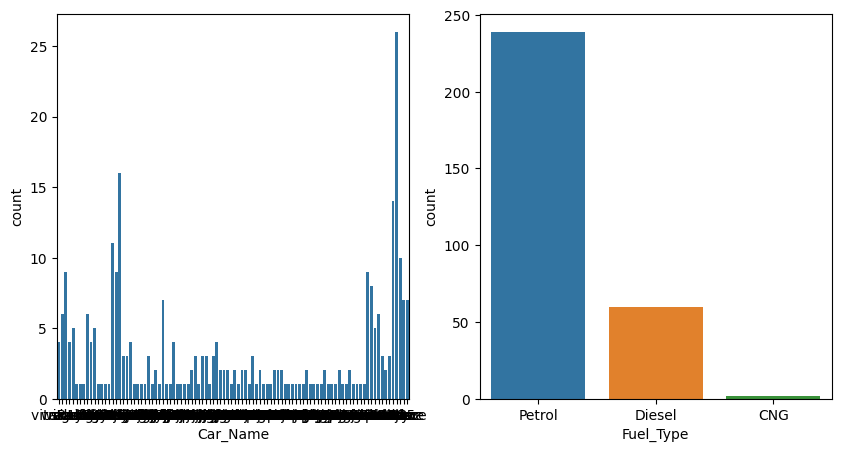

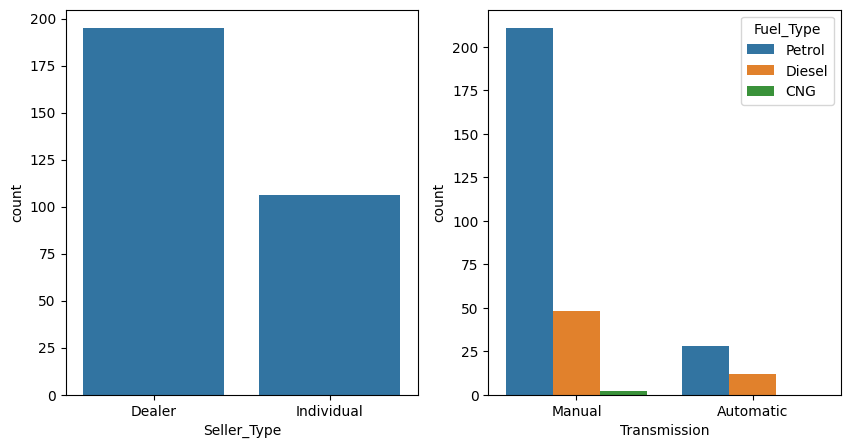

In [84]:
categorical_cols=['Car_Name','Fuel_Type','Seller_Type','Transmission']
i=0
while i<len(categorical_cols):
  fig=plt.figure(figsize=(10,5))#Width=10,Height=5
  plt.subplot(1,2,1)
  sns.countplot(x=categorical_cols[i],data=df)
  i+=1
  plt.subplot(1,2,2)
  sns.countplot(x=categorical_cols[i],hue='Fuel_Type',data=df)
  i+=1
  plt.show()

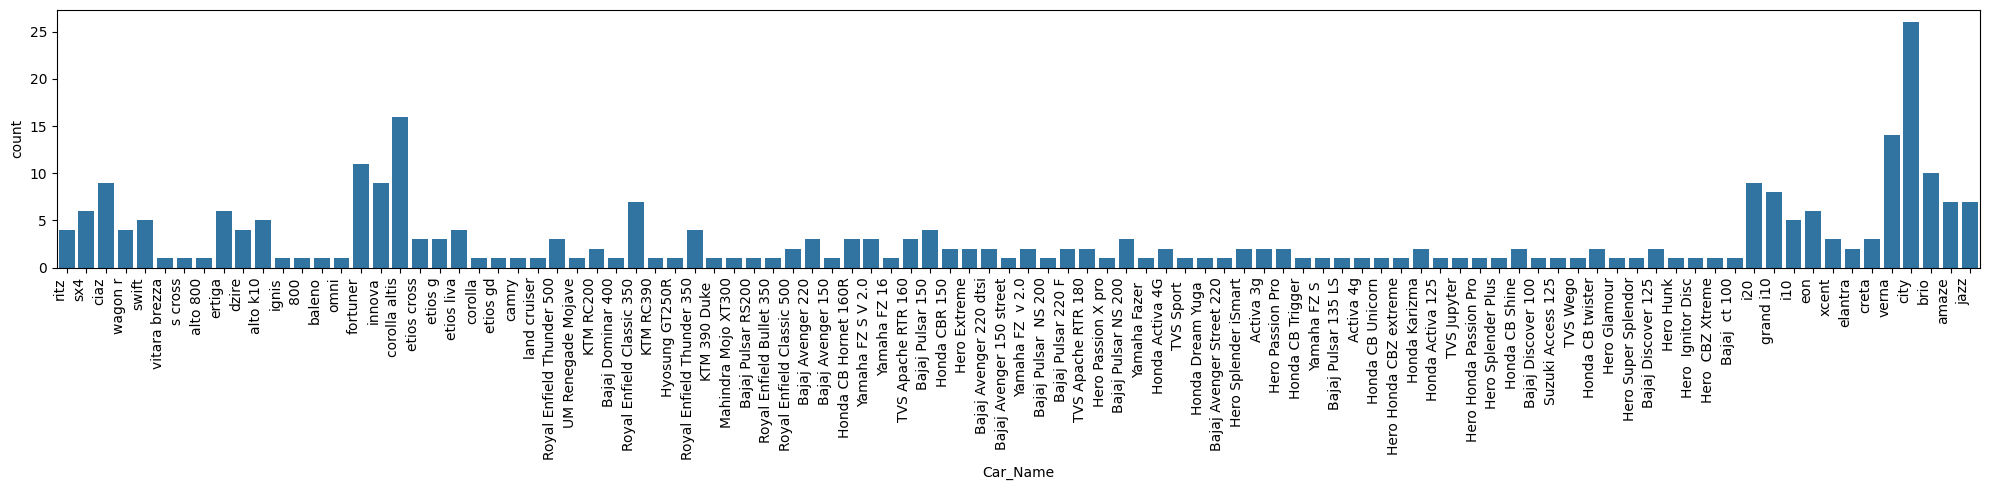

In [85]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = 'Car_Name',data = df,)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

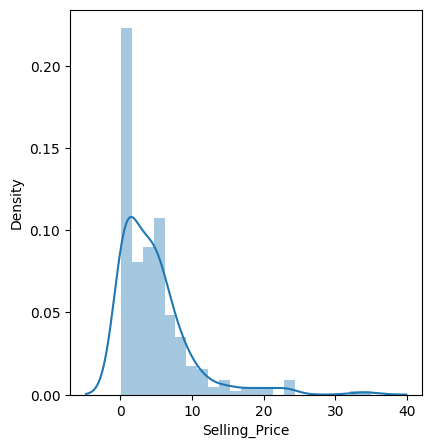

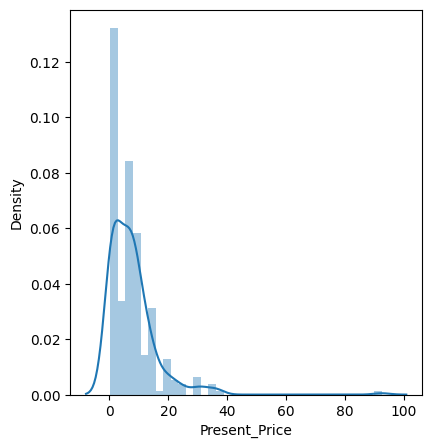

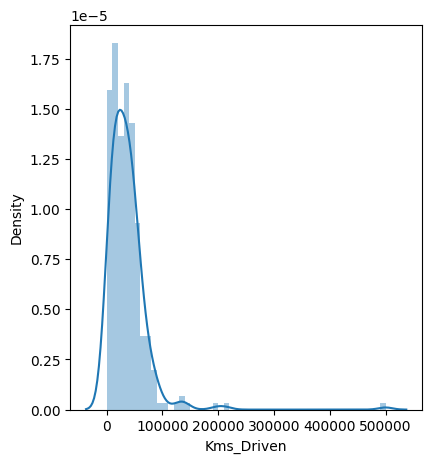

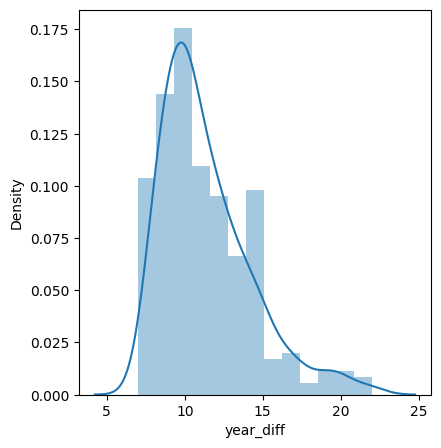

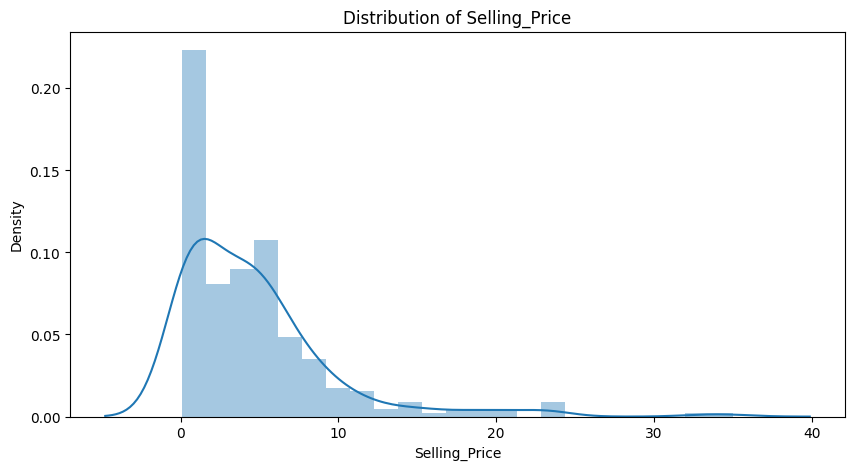

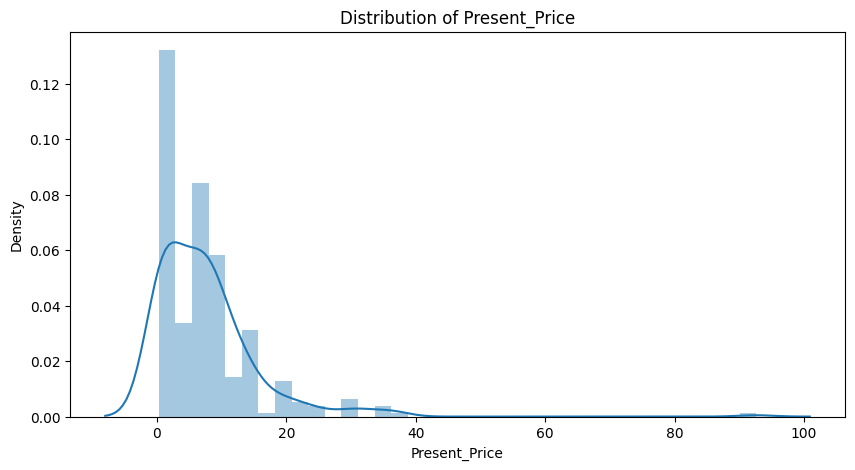

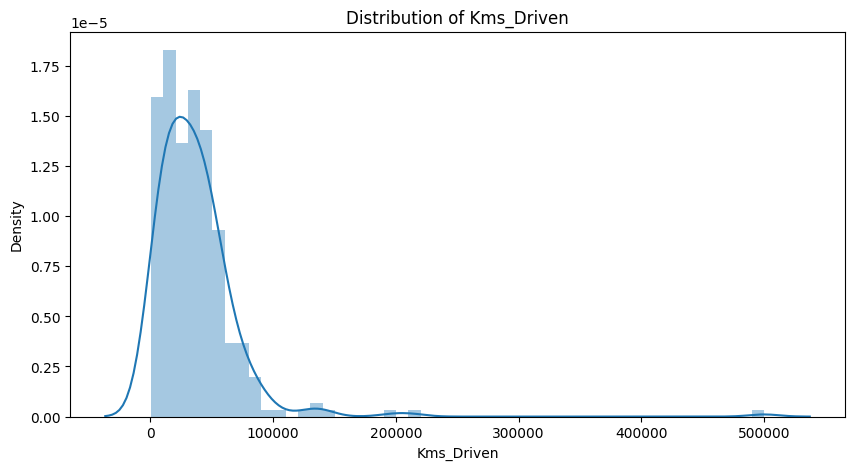

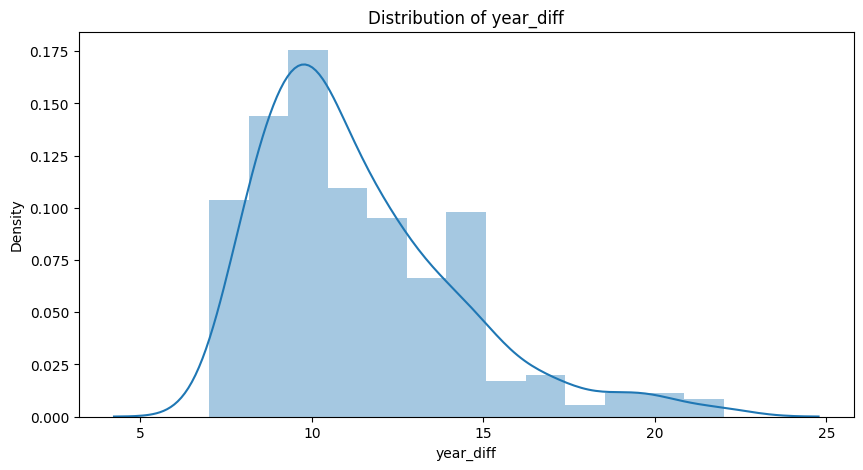

In [86]:
numerical_cols = ['Selling_Price','Present_Price','Kms_Driven','year_diff'] # Corrected column name
i = 0
while i < len(numerical_cols):
  fig = plt.figure(figsize = (10,5))
  plt.subplot(1,2,1)
  sns.distplot(df[numerical_cols[i]])
  i +=1
  plt.show() # Show the figure after plotting the single subplot

# Corrected loop structure to plot each column in a separate figure for clarity and avoiding the previous pattern issue:
numerical_cols = ['Selling_Price','Present_Price','Kms_Driven','year_diff'] # Corrected column name
for col in numerical_cols:
    fig = plt.figure(figsize=(10, 5))
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}') # Add a title for clarity
    plt.show()

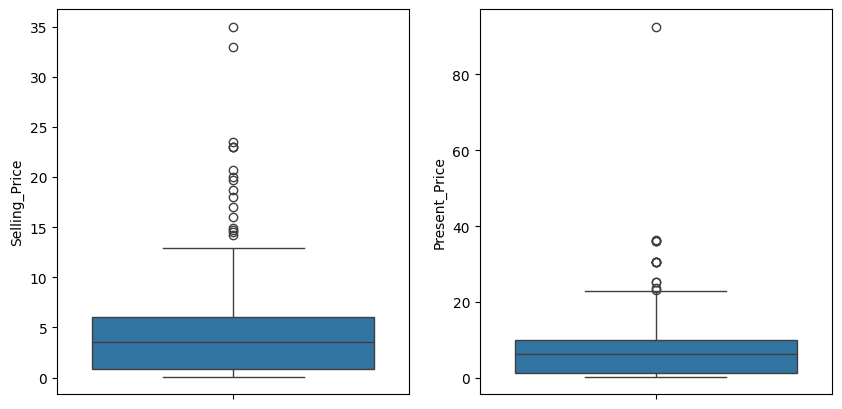

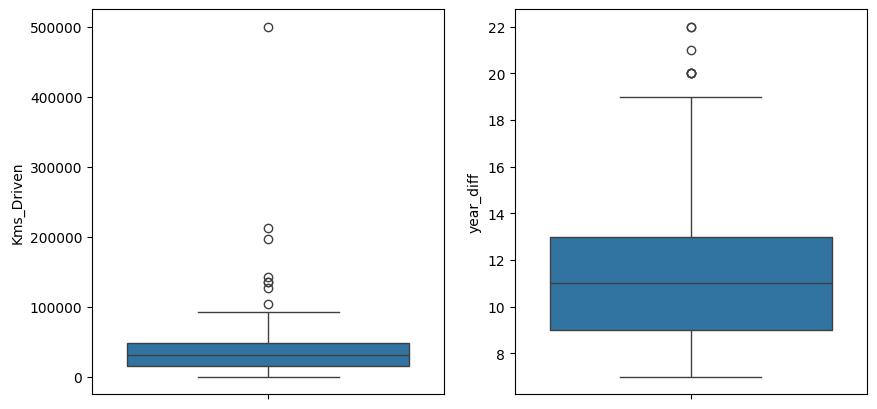

In [87]:
numerical_cols = ['Selling_Price','Present_Price','Kms_Driven','year_diff'] # Corrected column name
i = 0
while i < len(numerical_cols):
  fig = plt.figure(figsize = (10,5))
  plt.subplot(1,2,1)
  sns.boxplot(df[numerical_cols[i]])
  i +=1
  plt.subplot(1,2,2)
  sns.boxplot(df[numerical_cols[i]])
  i +=1
  plt.show()

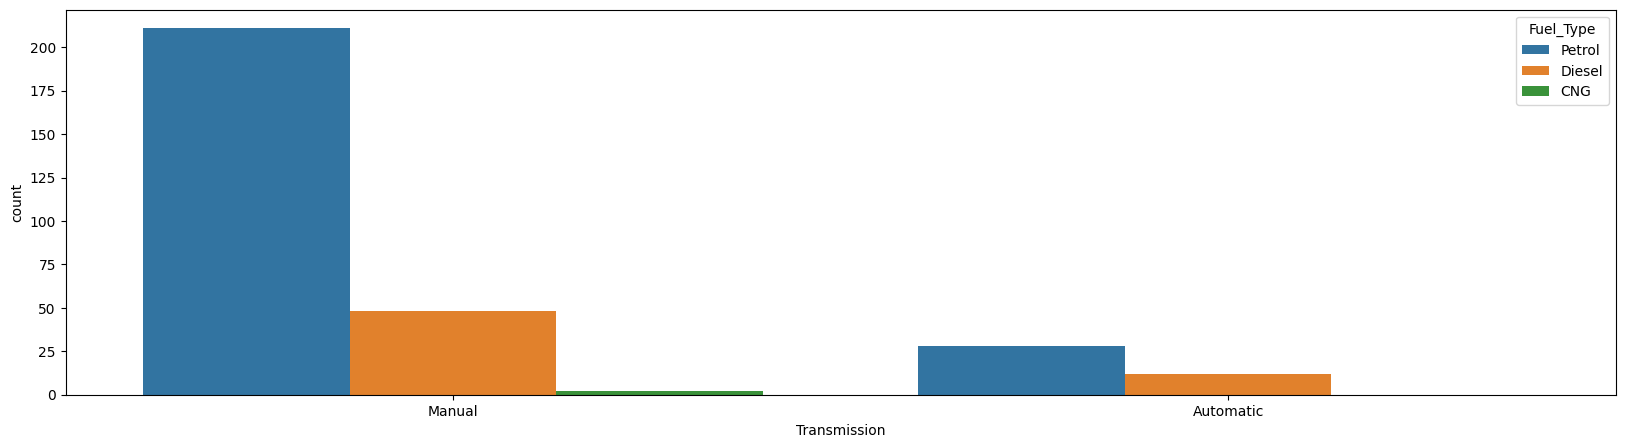

In [88]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = 'Transmission',data = df, hue = 'Fuel_Type')
plt.show()

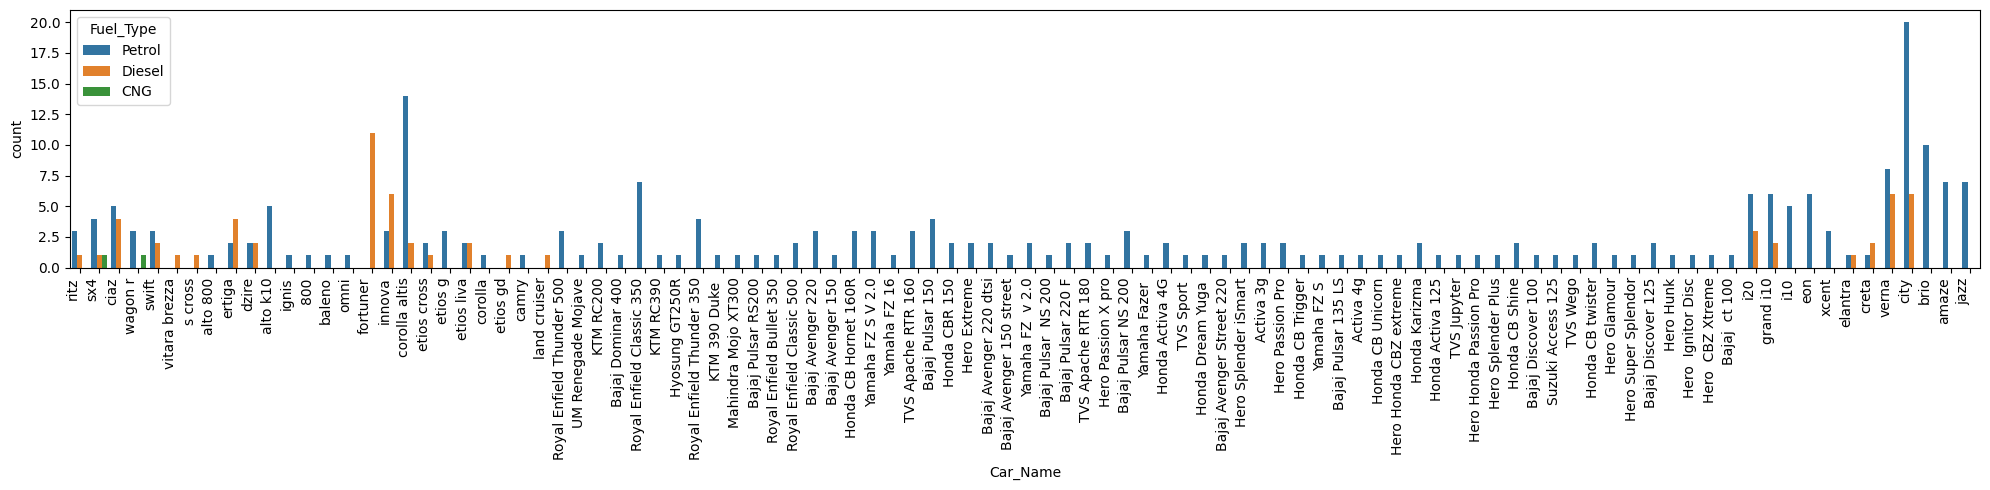

In [89]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = 'Car_Name',data = df, hue = 'Fuel_Type')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [90]:
df[df['Present_Price']>df['Present_Price'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_diff
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [91]:
df[df['Selling_Price']>df['Selling_Price'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_diff
63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0,10
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [92]:
df[df['Kms_Driven']>df['Kms_Driven'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_diff
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,20
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,15
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,17


<Axes: >

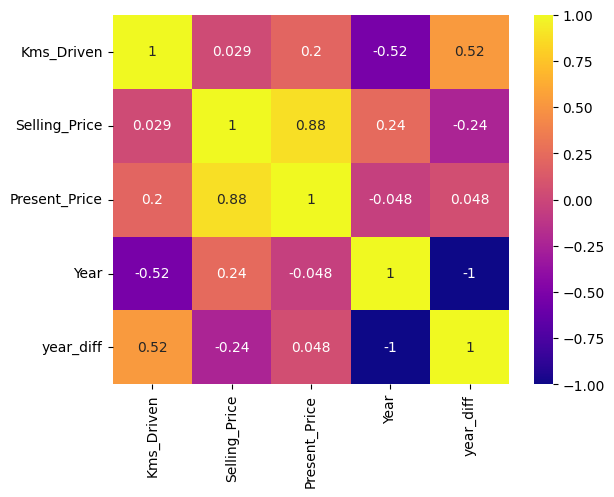

In [93]:
df1 = df[['Kms_Driven','Selling_Price','Present_Price','Year','year_diff']]
sns.heatmap(df1.corr(),annot = True, cmap = 'plasma')

In [94]:
df1.corr()['Selling_Price']

,Selling_Price
Kms_Driven,0.029187
Selling_Price,1.000000
Present_Price,0.878983
Year,0.236141
year_diff,-0.236141


In [95]:
df1.corr()['Present_Price']

,Present_Price
Kms_Driven,0.203647
Selling_Price,0.878983
Present_Price,1.000000
Year,-0.047584
year_diff,0.047584


In [96]:
df1.pivot_table(values='Selling_Price',index='Present_Price',aggfunc='mean')

,Selling_Price
Present_Price,
0.32,0.180000
0.47,0.270000
0.48,0.300000
0.51,0.340000
0.52,0.312500
...,...
25.39,21.875000
30.61,18.280000
35.96,20.746667


In [97]:
df.pivot_table(values='Selling_Price',index='Seller_Type',columns = 'Fuel_Type', aggfunc='mean')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [98]:
df.pivot_table(values='Present_Price',index='Transmission',aggfunc='mean', columns = 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Transmission,,,
Automatic,NaN,30.6425,8.746786
Manual,6.415,12.1075,5.163791


In [99]:
df1.head()

,Kms_Driven,Selling_Price,Present_Price,Year,year_diff
0,27000,3.35,5.59,2014,11
1,43000,4.75,9.54,2013,12
2,6900,7.25,9.85,2017,8
3,5200,2.85,4.15,2011,14
4,42450,4.60,6.87,2014,11


In [100]:
df2 = df[['Year','Selling_Price','Present_Price','Kms_Driven','year_diff','Fuel_Type','Transmission','Owner','Seller_Type']]

In [101]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,year_diff,Fuel_Type,Transmission,Owner,Seller_Type
0,2014,3.35,5.59,27000,11,Petrol,Manual,0,Dealer
1,2013,4.75,9.54,43000,12,Diesel,Manual,0,Dealer
2,2017,7.25,9.85,6900,8,Petrol,Manual,0,Dealer
3,2011,2.85,4.15,5200,14,Petrol,Manual,0,Dealer
4,2014,4.60,6.87,42450,11,Diesel,Manual,0,Dealer


In [102]:
df2['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [103]:
df2['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [104]:
df2['Owner'].unique()

array([0, 1, 3])

In [105]:
df2['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [106]:
df2 = pd.get_dummies(df2,drop_first=True)

In [107]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,year_diff,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,2014,3.35,5.59,27000,11,0,False,True,True,False
1,2013,4.75,9.54,43000,12,0,True,False,True,False
2,2017,7.25,9.85,6900,8,0,False,True,True,False
3,2011,2.85,4.15,5200,14,0,False,True,True,False
4,2014,4.60,6.87,42450,11,0,True,False,True,False


In [108]:
# Mapping False and True with 0 and 1 for the entire dataset
df3 = df2[['Fuel_Type_Diesel','Fuel_Type_Petrol','Transmission_Manual','Seller_Type_Individual']]
df3 = df3.applymap(lambda x: 1 if x == True else 0)

In [109]:
df3.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,0,1,1,0
1,1,0,1,0
2,0,1,1,0
3,0,1,1,0
4,1,0,1,0


In [110]:
df2.drop(['Fuel_Type_Diesel', "Fuel_Type_Petrol",'Transmission_Manual','Seller_Type_Individual'],axis=1,inplace=True)

In [111]:
df2

,Year,Selling_Price,Present_Price,Kms_Driven,year_diff,Owner
0,2014,3.35,5.59,27000,11,0
1,2013,4.75,9.54,43000,12,0
2,2017,7.25,9.85,6900,8,0
3,2011,2.85,4.15,5200,14,0
4,2014,4.60,6.87,42450,11,0
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,9,0
297,2015,4.00,5.90,60000,10,0
298,2009,3.35,11.00,87934,16,0
299,2017,11.50,12.50,9000,8,0


In [112]:
df2 = pd.concat([df2,df3],axis=1)

In [113]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,year_diff,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,2014,3.35,5.59,27000,11,0,0,1,1,0
1,2013,4.75,9.54,43000,12,0,1,0,1,0
2,2017,7.25,9.85,6900,8,0,0,1,1,0
3,2011,2.85,4.15,5200,14,0,0,1,1,0
4,2014,4.60,6.87,42450,11,0,1,0,1,0


In [114]:
#x and y values
x = df2.drop(['Selling_Price'],axis=1)
y = df2['Selling_Price']

In [115]:
x.head()

,Year,Present_Price,Kms_Driven,year_diff,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,2014,5.59,27000,11,0,0,1,1,0
1,2013,9.54,43000,12,0,1,0,1,0
2,2017,9.85,6900,8,0,0,1,1,0
3,2011,4.15,5200,14,0,0,1,1,0
4,2014,6.87,42450,11,0,1,0,1,0


In [116]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [117]:
x.shape


(301, 9)

In [118]:
y.shape

(301,)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [120]:
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (255, 9)
x_test shape: (46, 9)
y_train shape: (255,)
y_test shape: (46,)


In [121]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [122]:
all = []

def car_price_pred_model(model, model_name):
  model.fit(X_train,y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  r2_train = r2_score(y_train,y_pred_train)
  r2_test = r2_score(y_test,y_pred_test)
  all.append(r2_train)
  all.append(r2_test)
  cross_val = cross_val_score(model, X_train, y_train, cv=5)
  # Call the .mean() method to get the mean value before rounding
  cv_mean = cross_val.mean()
  all.append(round(cv_mean,2))
  mae_train = mean_absolute_error(y_train,y_pred_train)
  all.append(round(mae_train,2))
  mae_test = mean_absolute_error(y_test,y_pred_test)
  all.append(round(mae_test,2))
  mse_train = mean_squared_error(y_train,y_pred_train)
  all.append(round(mse_train,2))
  mse_test = mean_squared_error(y_test, y_pred_test)
  all.append(round(mse_test,2))
  fig, ax = plt.subplots(1,2,figsize=(10,4))
  ax[0].set_title('Residual plot of training data')
  sns.distplot(y_train-y_pred_train,ax=ax[0])
  ax[0].set_xlabel('y_train-y-pred_train')
  ax[1].set_title('Residual plot of testing data')
  ax[1].scatter(x = y_test, y = y_pred_test)
  ax[1].set_xlabel('y_test')
  ax[1].set_ylabel('y_pred_test')
  plt.show()
  return all


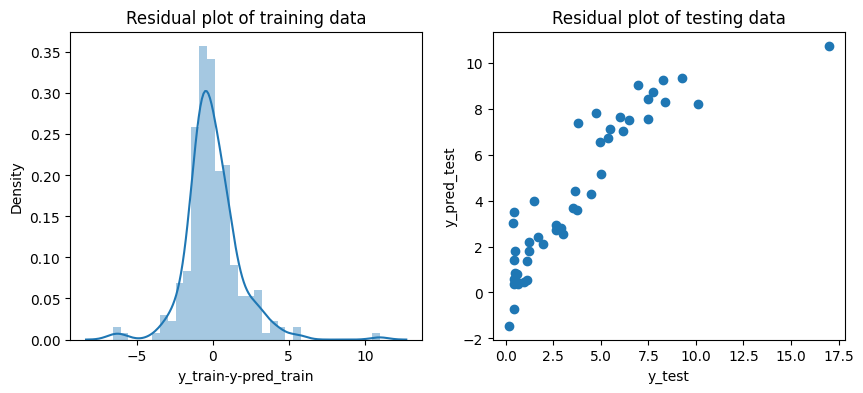

[0.8885407883280818,
 0.7874168534979462,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55]

In [123]:
lr = LinearRegression()
car_price_pred_model(lr,'Linear Regression')

In [124]:
# coefficients of the linear model
lr.coef_

array([ 1.87036273e-01,  4.31593986e-01, -6.82588662e-06, -1.87036273e-01,
       -8.56898637e-01,  2.64434174e+00,  6.58317034e-01, -1.66576069e+00,
       -1.12852529e+00])

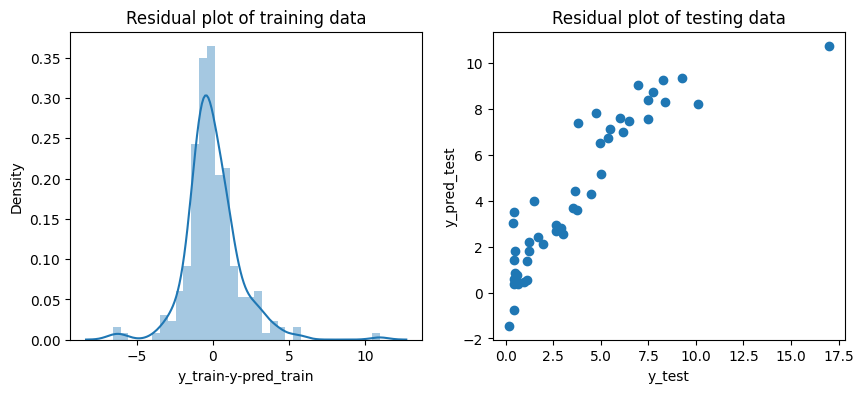

[0.8885407883280818,
 0.7874168534979462,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885372322255283,
 0.7877116126220909,
 np.float64(0.84),
 1.21,
 1.06,
 3.13,
 2.55]

In [125]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3, num =14)
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha = alpha))
car_price_pred_model(rg_rs,"ridge.pkl")


# **Lasso Regression (L1 Regularization)**

It is a regularization technique used to prevent overfitting. It improves linear regression by adding a penalty term to the standard regression equation. It works by minimizing the sum of squared differences between the observed and predicted values by fitting a line to the data.



# New Section

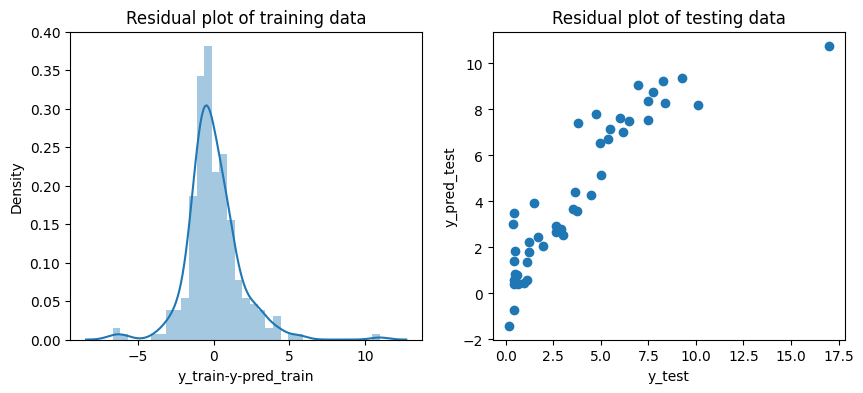

[0.8885407883280818,
 0.7874168534979462,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885372322255283,
 0.7877116126220909,
 np.float64(0.84),
 1.21,
 1.06,
 3.13,
 2.55,
 0.8884105661193571,
 0.7892499020337616,
 np.float64(0.83),
 1.22,
 1.06,
 3.13,
 2.53]

In [126]:
# lasso regression
from sklearn.linear_model import Lasso
ls = Lasso()
alpha = np.logspace(-3,3, num =14)
ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha = alpha))
car_price_pred_model(ls_rs,"lasso.pkl")

 Random Forest Regression technique for predicting numerical values. It predicts continuous values by averaging the results of multiple decision trees.



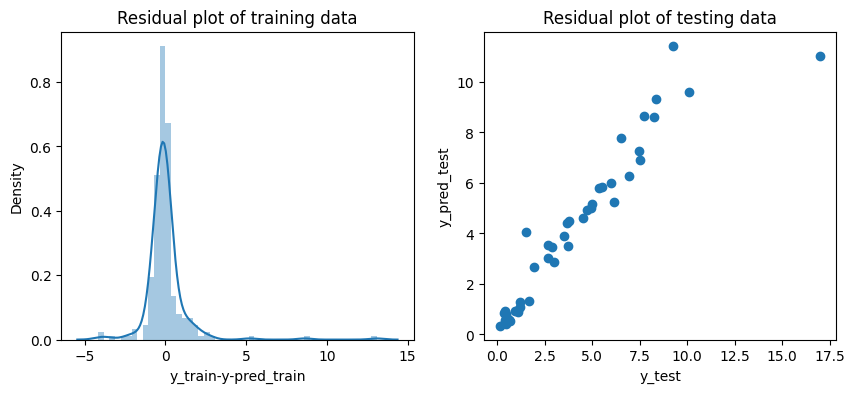

[0.8885407883280818,
 0.7874168534979462,
 np.float64(0.85),
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885372322255283,
 0.7877116126220909,
 np.float64(0.84),
 1.21,
 1.06,
 3.13,
 2.55,
 0.8884105661193571,
 0.7892499020337616,
 np.float64(0.83),
 1.22,
 1.06,
 3.13,
 2.53,
 0.9386501720404677,
 0.8968576772533828,
 np.float64(0.85),
 0.6,
 0.57,
 1.72,
 1.24]

In [127]:
from datetime import MINYEAR
#Random Forest REgression technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
n_estimators=list(range(500,1000,100))
max_depth=list(range(4,9,4))
min_samples_split=list(range(2,10,2))
min_samples_leaf=[1,2,5,7]
max_features=['auto','sqrt']
param_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}
rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_price_pred_model(rf_rs,"random_forest.pkl")

Gradient Boosting Regression is especially for regression tasks. It builds an ensemble (a collection) of weak learners (usually decision trees), where each tree tries to correct the errors made by the previous ones.

It’s called gradient boosting because it uses gradient descent to minimize the loss (error) function of the model.



In [ ]:
#Gradient boosting technique
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Changed from assigning the class to creating an instance
gb = GradientBoostingRegressor()

learning_rate =[0.001,0.01,0.1,0.2]
n_estimators=list(range(500,1000,100))
max_depth=list(range(4,9,4))
min_samples_split=list(range(2,10,2))
min_samples_leaf=[1,2,5,7]
max_features=['auto','sqrt']
param_grid={
    'learning_rate':learning_rate,
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}
gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_price_pred_model(gb_rs,"gradient_boosting.pkl")